In [18]:
# Based on Erik's script: plotting_NEMO.ipynb
%pylab inline
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point
import matplotlib.colors as colors
#import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.path as mpath
import matplotlib.ticker as mticker
from matplotlib.patches import Polygon, Ellipse
from glob import glob
import cmocean.cm as cmo
import gsw
import pickle

# Added this (from a forum) as a temporary fix to error I was getting regarding 'GeoAxes not having a _hold function'
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

Populating the interactive namespace from numpy and matplotlib


In [19]:
datadir = '/projects/0/topios/hydrodynamic_data/NEMO-MEDUSA/ORCA0083-N006/means/'
datadir_bgc = '/projects/0/topios/hydrodynamic_data/NEMO-MEDUSA_BGC/ORCA0083-N006/means/' 
dirread_mesh = '/projects/0/topios/hydrodynamic_data/NEMO-MEDUSA/ORCA0083-N006/domain/' 
dirwrite = '/home/dlobelle/Kooi_data/NEMO_phys_params/'

xslice = slice(0, 4300)
yslice = slice(0, 3057)
zslice = slice(0,1)
nav_lon = xr.open_dataset(dirread_mesh+'coordinates.nc',decode_times=False).nav_lon.sel(x=xslice, y = yslice) 
nav_lat = xr.open_dataset(dirread_mesh+'coordinates.nc',decode_times=False).nav_lat.sel(x=xslice, y = yslice) 
# nav_lat = nav_lat.fillna(0.)

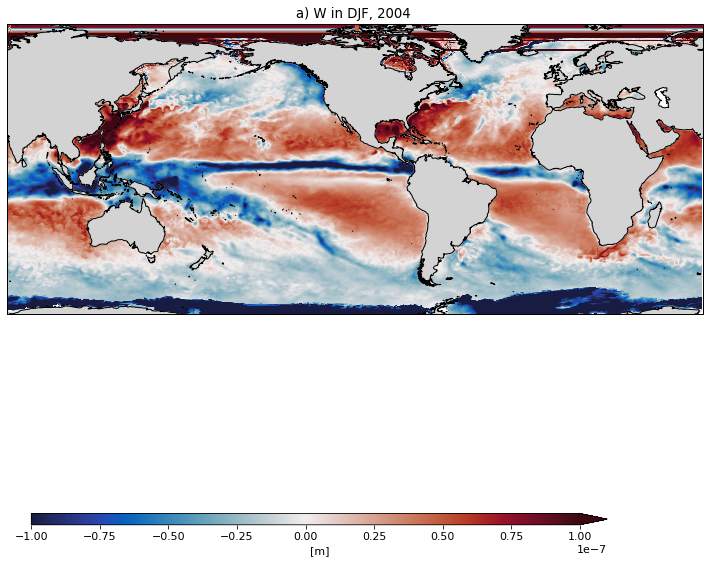

In [36]:
from time import sleep
from progressbar import progressbar
''' Preparing the projection and subplots'''
plt.rc('font', size = 11)
projection = cartopy.crs.PlateCarree(central_longitude=72+180) #PlateCarree() #central_longitude=0)
fig = plt.figure(figsize=(10,10.5)) #, constrained_layout=True) #True) # 10,5 #(18,25)
gs = fig.add_gridspec(figure = fig, nrows = 2, ncols = 1, height_ratios=[6,1])#6,6,6,1])#,hspace = 1, wspace = 1)

''' Extract all files within a season into one variable '''

seasnames = ['DJF'] #, 'MAM', 'JJA', 'SON']
monvals = ['12'] #,'01','02','03','04','05','06','07','08','09','10','11']

row = 0
col = 0
i = 0
seas = seasnames[row]
#yr0 = '2004'
#yr1 = '2004'

ai = fig.add_subplot(gs[row, col], projection=projection)
ai.coastlines(resolution='50m',zorder=3)
ai.add_feature(cartopy.feature.LAND, color='lightgrey', zorder=2)
ai.set_ylim([-70, 80]) #,crs=cartopy.crs.PlateCarree())
#ai.set_xlim([210,222])
yr0 = '2003'
mons = monvals[0:1]

M0 = xr.open_mfdataset(datadir+f'ORCA0083-N06_{yr0}{mons[0]}*d05W.nc',combine='by_coords').wo.sel(x=xslice, depthw=zslice).mean('time_counter')     
M0 = M0.assign_coords(nav_lat=M0.nav_lat.fillna(0.))
M0 = M0.assign_coords(nav_lon=M0.nav_lon.where(M0.nav_lon<72, M0.nav_lon-360)) 

a = M0.plot(ax=ai, x='nav_lon', y='nav_lat', add_colorbar=False, vmin = -1e-7, vmax = 1e-7, rasterized=True, cmap=cmo.balance, zorder = 1, transform=cartopy.crs.PlateCarree()) 
title = 'W in %s, 2004' % seas

M0.to_netcdf(dirwrite+'W_2004_'+seas+'.nc')
ai.set_title('%s) %s ' % (chr(ord('a') + row*2 + col), title))

cbaxes = fig.add_axes([0.05, 0.045, 0.8, 0.015]) # defines the x, y, w, h of the colorbar 
plt.colorbar(a, cax=cbaxes, orientation="horizontal", aspect=100, extend='max', label='[m]', use_gridspec=True)

fig.canvas.draw()
plt.tight_layout()

In [9]:
M0 = xr.open_mfdataset(datadir+f'ORCA0083-N06_{yr0}{mons[0]}*d05W.nc')

In [10]:
M0

<xarray.Dataset>
Dimensions:               (depthw: 75, time_bounds: 2, time_counter: 7, x: 4322, y: 3059)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(3059, 4322), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(3059, 4322), meta=np.ndarray>
  * depthw                (depthw) float32 0.0 1.0239066 ... 5596.249 5800.0
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2003-11-29T12:00:00 ....
Dimensions without coordinates: time_bounds, x, y
Data variables:
    wo                    (time_counter, depthw, y, x) float32 dask.array<chunksize=(1, 75, 3059, 4322), meta=np.ndarray>
    time_centered_bounds  (time_counter, time_bounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, time_bounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    difvho                (time_counter, depthw, y, x) float32 dask.array<chunksize=(1, 75, 3059, 4322), meta=np.ndarray>
Attributes:
    name:                 ORCA0083-N06_5d_20030401_20031231
    description:          ocean W grid variables
    conventions:          CF-1.1
    production:           An IPSL model
    timeStamp:            2015-Apr-12 18:46:39 BST
    ibegin:               1
    ni:                   4322
    jbegin:               1
    nj:                   39
    DOMAIN_number_total:  80
    DOMAIN_size_global:   [4322 3059]

100% (4 of 4) |##########################| Elapsed Time: 0:06:38 Time:  0:06:38


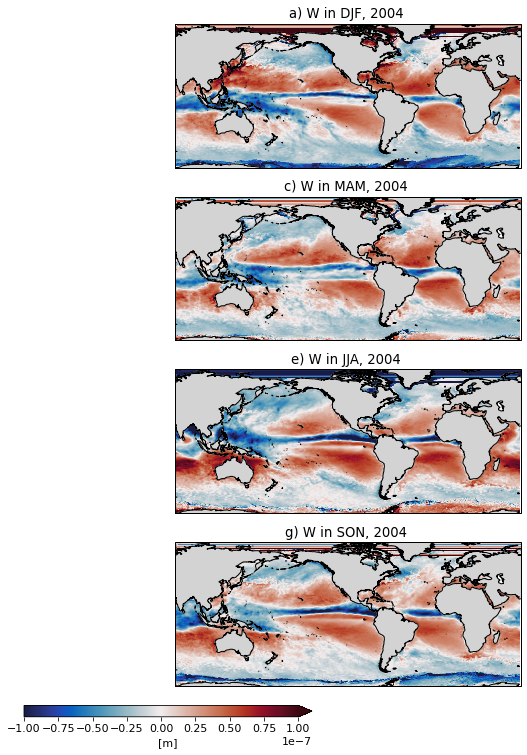

In [40]:
## To plot the MLD and algal conc (converted from MEDUSA phytoplankton conc) subplots in one figure: 2 columns 

from time import sleep
from progressbar import progressbar

''' Preparing the projection and subplots'''
plt.rc('font', size = 11)
projection = cartopy.crs.PlateCarree(central_longitude=72+180) #PlateCarree() #central_longitude=0)
fig = plt.figure(figsize=(10,10.5)) #, constrained_layout=True) #True) # 10,5 #(18,25)
gs = fig.add_gridspec(figure = fig, nrows = 5, ncols = 1, height_ratios=[6,6,6,6,1])#,hspace = 1, wspace = 1)

''' Extract all files within a season into one variable '''

seasnames = ['DJF', 'MAM', 'JJA', 'SON']
monvals = ['12','01','02','03','04','05','06','07','08','09','10','11']


# parameters = {'axes.labelsize': 22,
#               'axes.titlesize': 22}
# plt.rcParams.update(parameters)

for row in progressbar(range(4)): # seasons
    sleep(0.02)
    for col in range(1): # params
        i = row*2 + col
        seas = seasnames[row]
        yr0 = '2004'
        yr1 = '2004'

        ai = fig.add_subplot(gs[row, col], projection=projection)
        ai.coastlines(resolution='50m',zorder=3)
        ai.add_feature(cartopy.feature.LAND, color='lightgrey', zorder=2)
        ai.set_ylim([-70, 80]) #,crs=cartopy.crs.PlateCarree())

        if row == 0: 
            yr0 = '2003'
            mons = monvals[0:3]
        if row == 1: 
            mons = monvals[3:6]
        if row == 2: 
            mons = monvals[6:9]
        if row == 3: 
            mons = monvals[9:12]

        #if i ==0 or i == 2 or i ==4 or i ==6:           
        M0 = xr.open_mfdataset((glob(datadir+'ORCA0083-N06_%s%s*d05W.nc' % (yr0,mons[0]) )+ glob(datadir+'ORCA0083-N06_%s%s*d05W.nc' % (yr1,mons[1]))+ 
                                      glob(datadir+'ORCA0083-N06_%s%s*d05W.nc'% (yr1,mons[2]))),combine='by_coords').wo.sel(x=xslice, depthw=zslice).mean('time_counter')     
        M0 = M0.assign_coords(nav_lat=M0.nav_lat.fillna(0.))
        M0 = M0.assign_coords(nav_lon=M0.nav_lon.where(M0.nav_lon<72, M0.nav_lon-360)) 

        a = M0.plot(ax=ai, x='nav_lon', y='nav_lat', add_colorbar=False, vmin = -1e-7, vmax = 1e-7,  rasterized=True, cmap=cmo.balance, zorder = 1, transform=cartopy.crs.PlateCarree()) 
        title = 'W in %s, 2004' % seas

        M0.to_netcdf(dirwrite+'W_2004_'+seas+'.nc')
                
#         if i ==1 or i == 3 or i ==5 or i ==7:            
#             M1 = xr.open_mfdataset((glob(datadir_bgc+'ORCA0083-N06_%s%s*d05P.nc' % (yr0,mons[0]) )+ glob(datadir_bgc+'ORCA0083-N06_%s%s*d05P.nc' % (yr1,mons[1]))+ 
#                                           glob(datadir_bgc+'ORCA0083-N06_%s%s*d05P.nc'% (yr1,mons[2]))),combine='by_coords').PHD.sel(x=xslice,deptht = slice(0,1)).mean('time_counter')

#             M2 = xr.open_mfdataset((glob(datadir_bgc+'ORCA0083-N06_%s%s*d05P.nc' % (yr0,mons[0]) )+ glob(datadir_bgc+'ORCA0083-N06_%s%s*d05P.nc' % (yr1,mons[1]))+ 
#                                           glob(datadir_bgc+'ORCA0083-N06_%s%s*d05P.nc'% (yr1,mons[2]))),combine='by_coords').PHN.sel(x=xslice,deptht = slice(0,1)).mean('time_counter') 
            
#             ''' Total phytoplankton: non-diatom + diatom '''
           
#             M = M1[0]+M2[0]
            
#             ''' Converting phytoplankton conc [mmol N m-3] to number of algal cells per m3 '''
            
#             M = M*14.007                       # conversion from [mmol N m-3] to [mg N m-3] (atomic weight of 1 mol of N = 14.007 g)   
#             M = M/356.04e-09                   # conversion from [mg N m-3] to [no. m-3]: median value from Menden-Deuer and Lessard 2000
                     
#             M = M.assign_coords(nav_lat=M0.nav_lat.fillna(0.))
#             M = M.assign_coords(nav_lon=M0.nav_lon.where(M0.nav_lon<72, M0.nav_lon-360)) 

#             a2 = M.plot(ax=ai, x='nav_lon', y='nav_lat', add_colorbar=False, vmin=0, vmax=4e7, rasterized=True, cmap=cmo.algae, zorder = 1, transform=cartopy.crs.PlateCarree()) 
#             title = 'Algal conc. in %s, 2004' % seas
            
#             M.to_netcdf(dirwrite+'algal_conc_2004_'+seas+'.nc')

        ai.set_title('%s) %s ' % (chr(ord('a') + row*2 + col), title))
        #plt.rc('font', size = 16)
   # plt.title('Average mixed layer depth in Jan 2004')

#plt.rc('font', size = 11)
cbaxes = fig.add_axes([0.05, 0.045, 0.4, 0.015]) # defines the x, y, w, h of the colorbar 
plt.colorbar(a, cax=cbaxes, orientation="horizontal", aspect=100, extend='max', label='[m]', use_gridspec=True) #, fontsize = 22)
#plt.rc('font', size = 14)

# cbaxes2 = fig.add_axes([0.55, 0.045, 0.4, 0.015]) # defines the x, y, w, h of the colorbar 
# plt.colorbar(a2, cax=cbaxes2, orientation="horizontal", aspect=100, extend='max', label='[no. m$^{-3}$]', use_gridspec=True) #, fontsize = 22)
#plt.rc('font', size = 14)

fig.canvas.draw()
plt.tight_layout()
#plt.savefig('/home/dlobelle/Kooi_figures/non_parcels_output/NEMO_MLD_algae_allseas_2004.pdf')